# Pentatonic Television: Predicting Future TV buyers

The machine learning component of this is not the focus, it is additional. The focus is data exploration and cleaning in preparation for machine learning

--------------------

## Introduction

**Problem**:
You work for the ficticious electronic company called Pentatonic specialized into selling
high-end televisions. 
One day, your manager comes to you and ask you to build a model in
order to identify potential future TV buyers. Interestingly, the company has access to the data of
thousands customers and wants to prepare a marketing campaign toward the clients of the
company Meridian that was just purchased by Pentatonic. Can you help your manager?
The data set comes into two different files. You can do anything you want with it just as long as
you can build an awesome predictive model. What are the most important desired
characteristics of a potential customer? Who will less likely respond to the campaign?
You have 11 days to come up with a solution.

This project is divided in 5 sections:

    1.Data Exploration
    
        1.1 The Data

        1.2 Data Description & Preprocessing
    
        1.3 Assessing Missing Values
    
        1.4 Investigating the dataset 'electronics'
    
        1.5 Investigating the dataset 'profile'
    
        1.6 Re-encoding Some Features


    2.0 Some Data Visualization
     
     
    3.0 Encoding Categorical Features for Machine Learning
     
      
    4.0 Model Selection: Logitic Regression, Gradient Boosting and Random Forest
        
        4.1 Feature Importances
        
    5.0 Conclusion



In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# To be able to view all of the columns when viewing the dataset
pd.options.display.max_columns = None

#  1-Data Exploration
## 1.1 The Data

In [2]:
# Loading the data
electronics = pd.read_csv("electronics.csv")
profile = pd.read_excel('profile.xlsx')
datasets = [electronics, profile]

In [3]:
# Functions used in this project
        
def creating_distplot(size, data, features):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(data[features[i]])
        
def creating_boxplots(size, target, features, data):
    plt.figure(figsize=size)
    for i in range(len(numerical_vars)):
        plt.subplot(5, 3, i+1)
        sns.boxplot(x=target, y=features[i], data=data )

def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, 
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)

## 1.2 Data Description & Preprocessing

In [4]:
# First, let's look at the description of each data set
print(electronics.info())
print()
print(profile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date of year       20490 non-null  object 
 1   clients            20500 non-null  int64  
 2   previously_shoped  20490 non-null  float64
 3   member             20490 non-null  float64
 4   promotion          20490 non-null  float64
 5   shop_competitor    20490 non-null  float64
 6   prize_won          20490 non-null  float64
 7   require_financing  20490 non-null  float64
 8   got_a_TV           20490 non-null  float64
 9   did_a purchase     20490 non-null  float64
 10  promotions_used    20490 non-null  float64
 11  LT_clients         20490 non-null  float64
 12  prize_amount       20490 non-null  float64
 13  amount_financing   20490 non-null  float64
 14  amount_purchase    19477 non-null  float64
 15  nb_electronics     20490 non-null  float64
dtypes: float64(14), int64(

We can observe some missing values, and the date column for the first data set can be converted to a datetime format.

In [5]:
electronics.head()

,Date of year,clients,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,2018-08-31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,NaN,1.0
1,2017-10-31,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,2018-05-31,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,2018-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,2018-10-31,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


In [6]:
# Let's use pandas' method to convert to datetime
electronics['Date of year']= pd.to_datetime(electronics['Date of year'])
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date of year       20490 non-null  datetime64[ns]
 1   clients            20500 non-null  int64         
 2   previously_shoped  20490 non-null  float64       
 3   member             20490 non-null  float64       
 4   promotion          20490 non-null  float64       
 5   shop_competitor    20490 non-null  float64       
 6   prize_won          20490 non-null  float64       
 7   require_financing  20490 non-null  float64       
 8   got_a_TV           20490 non-null  float64       
 9   did_a purchase     20490 non-null  float64       
 10  promotions_used    20490 non-null  float64       
 11  LT_clients         20490 non-null  float64       
 12  prize_amount       20490 non-null  float64       
 13  amount_financing   20490 non-null  float64       
 14  amount

## 1.3 Assessing Missing Values

In [7]:
# Before merging the different datasets together, we want to assess if any missing values
# can be found in the different datasets
def null_columns(df):
    return(pd.isnull(df).sum())

for dataset in datasets:
    print("The data set has", dataset.shape[0], "rows and", dataset.shape[1], "columns")
    print(null_columns(dataset))


The data set has 20500 rows and 16 columns
Date of year           10
clients                 0
previously_shoped      10
member                 10
promotion              10
shop_competitor        10
prize_won              10
require_financing      10
got_a_TV               10
did_a purchase         10
promotions_used        10
LT_clients             10
prize_amount           10
amount_financing       10
amount_purchase      1023
nb_electronics         10
dtype: int64
The data set has 20500 rows and 11 columns
date                         0
clients                      0
female                       0
email                        0
live_with_parents            0
work                         0
family                       0
state                        0
education                    0
age                          0
monthly_spent_electronics    0
dtype: int64


## 1.4 Investigating the dataset 'electronics'

In [8]:
# Major problem with got_a_TV with missing value.
new_elect = electronics[~electronics['got_a_TV'].isna()]

# Let's look at the output
print(new_elect.isna().sum())

# Let's track the size of this data set:
print('Size: ',new_elect.shape)

Date of year            0
clients                 0
previously_shoped       0
member                  0
promotion               0
shop_competitor         0
prize_won               0
require_financing       0
got_a_TV                0
did_a purchase          0
promotions_used         0
LT_clients              0
prize_amount            0
amount_financing        0
amount_purchase      1013
nb_electronics          0
dtype: int64
Size:  (20490, 16)


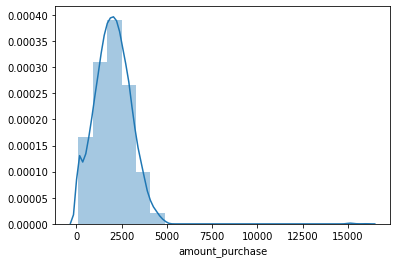

In [9]:
new_elect.head()
new_elect[new_elect['amount_purchase'].isna()]
new_elect['amount_purchase'].describe()

# Remove the missing values to see the distribution to see if we should do an imputation by the mean or median
tmp = new_elect[~new_elect['amount_purchase'].isna()]

# Look at the distribution
sns.distplot(tmp["amount_purchase"], bins=20)

# Make an executive decision :-) 
# Impute by the median, but only later

In [10]:
new_elect.head()

,Date of year,clients,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,2018-08-31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,NaN,1.0
1,2017-10-31,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,2018-05-31,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,2018-01-31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,2018-10-31,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


In [11]:
# Promotions_used vs. promotion ?
# Look at the two columns
new_elect[['promotion', 'promotions_used']]

# Proportion of promotion used when promotion = 0:
promo_0 = new_elect[new_elect['promotion'] == 0]
print(promo_0['promotions_used'].value_counts())

# Proportion of promotion used when promotion = 1:
promo_1 = new_elect[new_elect['promotion'] == 1]
print(promo_1['promotions_used'].value_counts())

# Proportion of promotions:
print(new_elect['promotion'].value_counts())

# Remove clients with  promotions_used > 6
new_elect = new_elect[new_elect['promotions_used'] < 6]

# Conclusion: Questions to ask your manager or DBA
# it's always a wise idea to contact the manager if you're confused about data that has little or no explanation given


1.0     5037
2.0     5009
3.0     1666
4.0      386
5.0       94
12.0       6
13.0       1
Name: promotions_used, dtype: int64
2.0     3451
1.0     3430
3.0     1093
4.0      239
5.0       74
13.0       2
12.0       2
Name: promotions_used, dtype: int64
0.0    12199
1.0     8291
Name: promotion, dtype: int64


In [12]:
# Understand the logic between columns
new_elect[['previously_shoped', 'did_a purchase', 'got_a_TV', 'amount_purchase']].head()

# # Look at "did_a purchase" and 'amount_purchase'
new_elect[['did_a purchase', 'amount_purchase']]

# # Let's look at how many zeros we have for 'did_a purchase'
new_elect[new_elect['did_a purchase'] == 0]

# # How many NaN do we have associated with did_a purchase = 0?
new_elect[new_elect['did_a purchase'] == 0].shape

# # Interestingly, it matches all the NaNs in this column
# # Therefore, we should encode the missing value as 0
new_elect = new_elect.fillna(0)


In [13]:
# # Is "require_financing" compatible with "amount_financing"?
new_elect[['require_financing', 'amount_financing']]

# # Look at the amount financed for clients requiring no financing
new_elect[new_elect['amount_financing'] == 0]['require_financing'].value_counts()

# # Check if clients who have required financing didn't get 0$
(new_elect[new_elect['require_financing'] == 1]['amount_financing'] == 0).sum()

0

In [14]:
# Let's look at the columns
new_elect[['prize_won', 'prize_amount']]

# Huge discrepancies between these to columns: Ask manager and/or colleagues for more information
# Random assumptions here: Assuming that prize amount is right
new_elect = new_elect.drop('prize_won', axis=1)


In [15]:
# Sanity check:
new_elect.describe()

,clients,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
count,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000,20479.000000
mean,10246.916890,0.091606,0.250647,0.404658,0.349919,0.248938,0.100640,0.950535,1.806924,10.174081,58.040910,5356.554275,1918.016016,0.413448
std,5914.673294,0.363926,0.433396,0.490838,0.476956,0.432408,0.300858,0.216843,0.840735,6.201481,82.435018,11306.091089,1098.013382,0.492464
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5125.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000,1200.000000,0.000000
50%,10247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,10.000000,0.000000,0.000000,1940.000000,0.000000
75%,15368.500000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,13.000000,130.972222,0.000000,2630.000000,1.000000
max,20490.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,131.000000,942.916667,212458.333300,16050.000000,1.000000


In [16]:
# Let's look at 'previously_shoped' feature: Unusual values
new_elect.previously_shoped.value_counts()

# Remove observations with value = 9:
new_elect = new_elect[new_elect['previously_shoped'] != 9]

## 1.5 Investigating the dataset 'profile'

In [17]:
# Now, let's look at the profile data set
profile.describe()

# for binary features, this is useful to be sure that the max value doesn't exceed 1.
# Lots of unusual observations :-). 

,clients,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics
count,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000
mean,10250.500000,0.549268,0.748293,0.296390,2.807317,1.042537,4.165659,2.703366,68.203073,5031.760163
std,5917.984595,0.544755,0.434005,0.456676,1.578659,2.693281,1.753248,1.513250,112.733445,2721.385233
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,23.000000,833.333333
25%,5125.750000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,41.000000,3833.333333
50%,10250.500000,1.000000,1.000000,0.000000,2.000000,0.000000,5.000000,3.000000,54.000000,5000.000000
75%,15375.250000,1.000000,1.000000,1.000000,4.000000,2.000000,6.000000,4.000000,68.000000,6083.333333
max,20500.000000,9.000000,1.000000,1.000000,6.000000,99.000000,6.000000,5.000000,1003.000000,94333.333330


In [18]:
# Female column: 
print(profile.female.value_counts())

# Level 9 is undefined; we will consider it as an error
# To keep the raw original data set intact, we are going to create a new df through this step
new_profile = profile[profile['female'] < 2]


1    11134
0     9352
9       14
Name: female, dtype: int64


In [19]:
# Let's look at the amount of siblings
print(new_profile['family'].value_counts())

# Let's remove rows with a value of 99
new_profile = new_profile[profile['family'] < 10]


0     12158
2      2755
1      2263
3      1520
4      1089
5       555
6       133
99       11
7         2
Name: family, dtype: int64


/Users/alexanderbennett/.local/share/virtualenvs/pentatonic-tv-S7ovQS4O/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


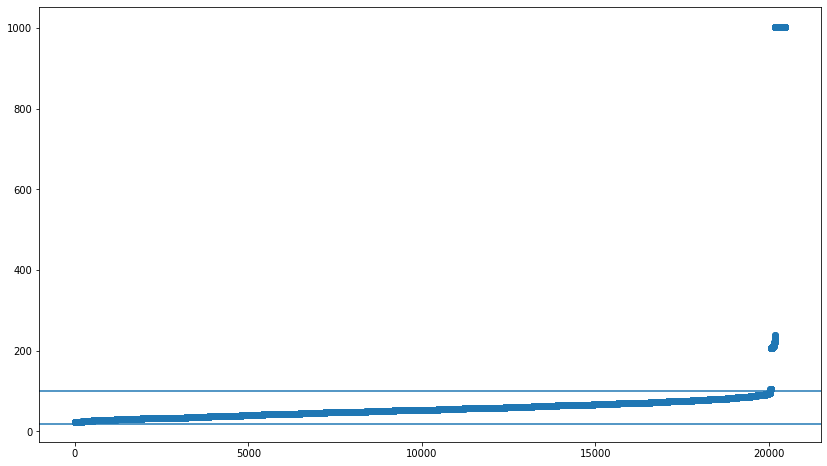

In [20]:
# Let's look at the age
# First, let's order age and reset the index
tmp = new_profile.sort_values('age').reset_index(drop=True)
plt.figure(figsize=(14,8))
plt.scatter(tmp.index, tmp.age)
plt.axhline(100)
plt.axhline(18)

# Let's remove all clients above 100
new_profile = new_profile[new_profile['age'] <100]

In [21]:
# Time to merge the two data sets
# Let's look at the size of our respective data sets
print('profile: ', new_profile.shape)
print('electronics: ', new_elect.shape)

# Merge the data sets
data = pd.merge(new_profile, new_elect, left_on='clients', right_on='clients', how='inner')
data.shape

profile:  (20054, 11)
electronics:  (20465, 15)


(20019, 25)

In [22]:
# Assessing if any duplicates are included in the various datasets:
data.duplicated().sum()


0

In [23]:
# Addressing seasonality, and maybe creating a new feature?
data[['date', 'Date of year']]

# Can we use the date with confidence?
(data['date'] == data['Date of year']).sum()

# We will drop both columns
data = data.drop(['date', 'Date of year'], axis=1)

In [24]:
data.head()

,clients,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,1,1,1,1,1,4,5,1,40,5916.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,0.0,1.0
1,2,0,1,0,3,0,1,3,57,5583.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,3,1,1,0,3,2,6,2,46,2666.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,4,1,1,0,2,4,5,5,72,5833.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,5,1,1,0,2,1,6,1,79,4916.666667,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


## 1.6 Re-encoding Some Features

In [25]:
# family appears to be have an ordinal encoding. So we should encode it properly so that there is no ordinal feature
# Encoding some features into a more adequate format
# these are prime candidates for one-hot encoding. Before that, we can change the encoding to be strings. Then, when we do one-hot encoding, the features will be more easily identified



# Encode Family feature
data['family'] = ['No kids' if x == 0
                 else '1 child' if x == 1
                 else '2 children' if x == 2
                 else '3 children' if x == 3
                 else '4+ children' if x >= 4
                 else 'N/A'
                 for x in data['family']]

# Encode State feature
data['state'] = ['California' if x == 1
                else 'Vermont' if x == 2
                else 'Colorado' if x == 3
                else 'Hawaii' if x == 4
                else 'Maine' if x == 5
                else 'Illinois'
                for x in data['state']]

# Encode Education feature ? :-)
# keep as ordinal. a higher degree is proxy for higher buying power, etc

# Encode Work feature ? :-)

data['work'] = ['professional' if x == 1
               else 'manager' if x == 2
               else 'blue_collar' if x == 3
               else 'white_Collar' if x == 4
               else 'retired' if x == 5
               else 'no_job'
               for x in data['work']]

In [26]:
data.head()

,clients,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics
0,1,1,1,1,professional,4+ children,Maine,1,40,5916.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,0.0,1.0
1,2,0,1,0,blue_collar,No kids,California,3,57,5583.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0
2,3,1,1,0,blue_collar,2 children,Illinois,2,46,2666.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0
3,4,1,1,0,manager,4+ children,Maine,5,72,5833.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0
4,5,1,1,0,manager,1 child,Illinois,1,79,4916.666667,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0


## 2.0 Some Data Visualization

                            clients    female     email  live_with_parents  \
clients                    1.000000 -0.005617 -0.004819           0.007622   
female                    -0.005617  1.000000  0.019343           0.013389   
email                     -0.004819  0.019343  1.000000          -0.001828   
live_with_parents          0.007622  0.013389 -0.001828           1.000000   
education                 -0.001083  0.008535 -0.000380           0.011128   
age                       -0.008803 -0.000288  0.012140          -0.003947   
monthly_spent_electronics  0.003513 -0.008229 -0.015658           0.001601   
previously_shoped          0.004336  0.014955  0.010018           0.009751   
member                    -0.008684  0.009757  0.002680          -0.008404   
promotion                  0.009667  0.000589  0.001401          -0.005695   
shop_competitor           -0.008831 -0.010208  0.010226           0.003727   
require_financing          0.005442 -0.000078 -0.004969         

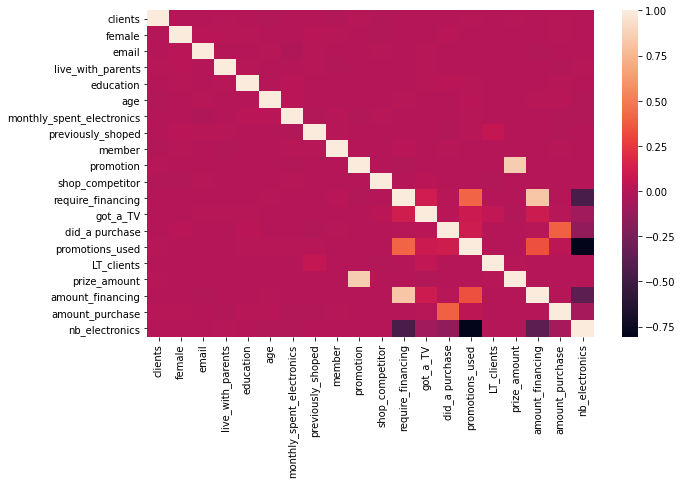

In [27]:
crossCorrelation(data)

### Strong correlation between promotion (binary) and prize_amount
### Strong correlation between require_financing and amount_financing
### Strong correlation between nb_electronics and promotions_used

<function __main__.creating_distplot(size, data, features)>

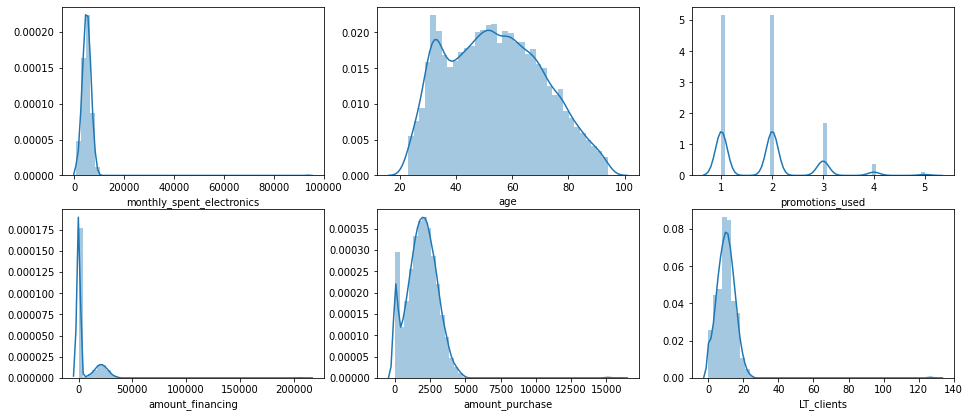

In [28]:
def creating_distplot(size, data, features):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(data[features[i]])


num_vars = ['monthly_spent_electronics', 'age', 'promotions_used', 'amount_financing', 'amount_purchase', 'LT_clients']

# Creating distribution plots
creating_distplot((16,18), data, num_vars)
creating_distplot

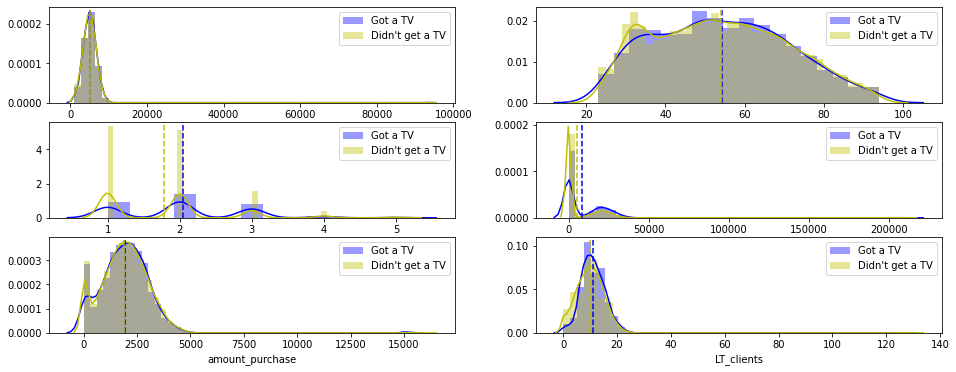

In [29]:
# Subsetting by 'got a TV'!
bought_tv = data["got_a_TV"] == 1
no_tv = data["got_a_TV"] == 0

# Creating the plots
features = ['monthly_spent_electronics', 'age', 'promotions_used', 'amount_financing', 'amount_purchase', 'LT_clients']
labels = ['Got a TV', "Didn't get a TV"]

def creating_plots(features, labels):
    plt.figure(figsize=(16,6))
    for feature in features:
        plt.subplot(3, 2, features.index(feature)+1)
        sns.distplot(data[feature][bought_tv], label=labels[0], color="b")
        sns.distplot(data[feature][no_tv], label=labels[1], color="y")
        plt.axvline(data[feature][bought_tv].mean(), linestyle = '--', color="b")
        plt.axvline(data[feature][no_tv].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)

## 3.0 Encoding Categorical Features for Machine Learning

In [30]:
# One-hot Encoding
data = pd.get_dummies(data)

In [31]:
data.head()

,clients,female,email,live_with_parents,education,age,monthly_spent_electronics,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a purchase,promotions_used,LT_clients,prize_amount,amount_financing,amount_purchase,nb_electronics,work_blue_collar,work_manager,work_no_job,work_professional,work_retired,work_white_Collar,family_1 child,family_2 children,family_3 children,family_4+ children,family_No kids,state_California,state_Colorado,state_Hawaii,state_Illinois,state_Maine,state_Vermont
0,1,1,1,1,1,40,5916.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,0.000000,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2,0,1,0,3,57,5583.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,0.0,1480.0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,3,1,1,0,2,46,2666.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,0.000000,0.0,3360.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,1,1,0,5,72,5833.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,0.0,970.0,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5,1,1,0,1,79,4916.666667,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,0.0,3380.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## 4.0 Model Selection: Logistic Regression, Gradient Boosting and Random Forest

In [32]:
# Separating the target and the explanatory features
y = data['got_a_TV']
X = data.drop(["clients", "got_a_TV"], axis=1)

# Creating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


def upsampling_data(X, y):
    # Upsampling the training set
    # Upsample using SMOTE
    sm = SMOTE(random_state=42)
    X_sm, y_sm = sm.fit_sample(X_train, y_train)
    return X_sm, y_sm


def minmax_data(X_train, X_test):
    # Standardization of the training and testing sets
    scaler = MinMaxScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)
    return X_train_sc, X_test_sc
    
    
def model_building(X_train, y_train, metrics, cv, model):
    # Performing cross validation
    cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=metrics).mean()
    return cv_score


def model_predict(model, X_train, y_train, X_topredict, y_true):    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_topredict)
    precision_metrics = precision_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return precision_metrics, conf_matrix

In [33]:
# Building 3 models to test
# Logistic Regression
model_lr = LogisticRegression(random_state=42)

# Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42, n_estimators=200,
                                   max_features='auto' , max_depth=5, subsample=0.8)

# Random Forest
model_rf = RandomForestClassifier(random_state=42)

In [ ]:
models = [model_lr, model_gb, model_rf]


for model in models:
    X_train_sm, y_train_sm = upsampling_data(X_train, y_train)
    X_train_sm_sc, X_test_sc = minmax_data(X_train_sm, X_test)
    cv_score = model_building(X_train_sm_sc, y_train_sm, 'precision', 5, model)
    print("metrics from CV:", round(cv_score,2))
    metrics, conf_matrix = model_predict(model, X_train_sm_sc, y_train_sm, X_test_sc, y_test)
    print("metrics from test set: ",round(metrics,2), "\nConfusion Matrix:\n", conf_matrix)

metrics from CV: 1.0
metrics from test set:  0.0 
Confusion Matrix:
 [[3597    3]
 [ 404    0]]
metrics from CV: 0.99
metrics from test set:  0.32 
Confusion Matrix:
 [[3587   13]
 [ 398    6]]


### 4.1 Feature Importances

In [ ]:

# Extracting feature importances from our model
feature_importances = pd.Series(model_rf.feature_importances_, 
                                index=data.drop(["clients", "got_a_TV"], axis=1).columns)

sub_feature_importances = feature_importances[:25]
print(sub_feature_importances)

sub_feature_importances.sort_values(inplace=True)
sub_feature_importances.plot(kind='barh', figsize=(7,6))

# 5. Conclusion

Considering the quality of the result we got, it would be recommended to explore other possibilities like tuning the models in order to optimize the result. In addition, looking at the ROC curve could help you choosing an appropriate threshold increasing precision as it was already covered in other workshops.